In [1]:
import numpy as np
import scanpy as sc
from sklearn import decomposition, manifold
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
from dtne import *
import time

In [3]:
adata = sc.read_h5ad('rc.integrated.data.h5ad')
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [4]:
sc.pp.neighbors(adata, 100,use_rep='X_pca')
sc.tl.diffmap(adata, 20)
sc.tl.dpt(adata, n_dcs=20,  copy=False)

C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


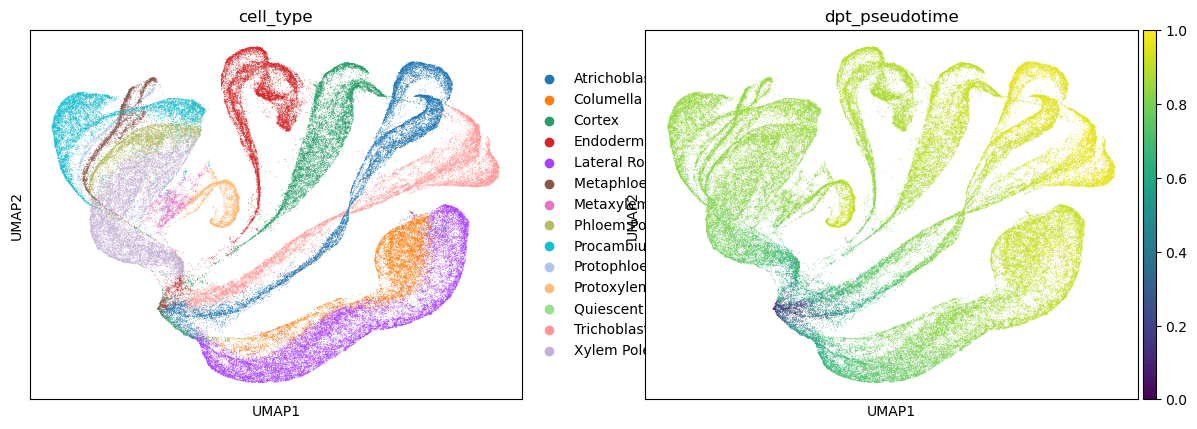

In [5]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['cell_type','dpt_pseudotime'])

In [6]:
adata.obs['dpt_pseudotime'].to_csv('rc.integrated.dpt_pseudotime.csv')

In [4]:
adata

AnnData object with n_obs × n_vars = 110427 × 17513
    obs: 'cell_type', 'cell_type2'
    uns: 'consensus_time', 'iroot'
    obsm: 'X_pca', 'umap'

In [5]:
sc.external.tl.palantir(adata,use_adjacency_matrix=False)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...


In [6]:
pal_res = sc.external.tl.palantir_results(adata,early_cell=adata.obs_names[3631])

Sampling and flocking waypoints...
Time for determining waypoints: 0.3654081066449483 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 2.7435927549997965 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9998
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [12]:
pal_res.pseudotime.to_csv('rc.integrated.palantir_pseudotime.csv')

In [17]:
pal_res.pseudotime.values

array([0.62845959, 0.79441071, 0.77154522, ..., 0.34124241, 0.19870502,
       0.63530289])

In [20]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

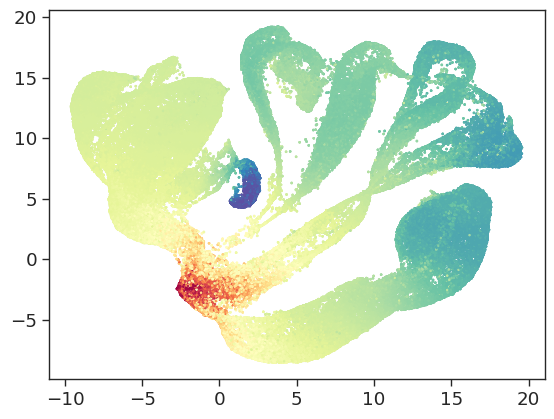

In [21]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0], umap[:,1], c=pal_res.pseudotime.values,s=1,cmap='Spectral')
plt.show()

In [8]:
dpt_pseudotime = pd.read_csv('rc.integrated.dpt_pseudotime.csv',index_col=0)
dpt_pseudotime.values.reshape(-1)

array([0.8359899 , 0.9420344 , 0.9107539 , ..., 0.54145926, 0.33150336,
       0.8485161 ])

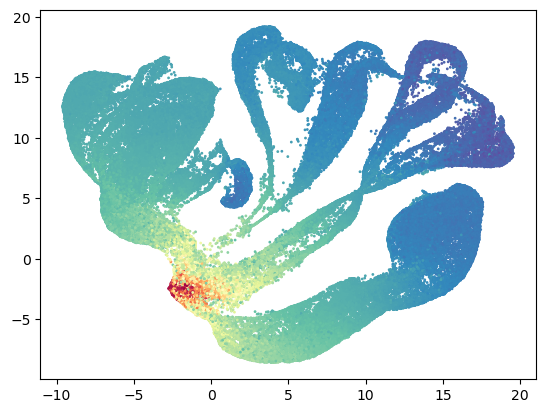

In [9]:
umap = adata.obsm['umap']
plt.scatter(umap[:,0], umap[:,1], c=dpt_pseudotime.values.reshape(-1),s=1,cmap='Spectral')
plt.show()